<a href="https://colab.research.google.com/github/Prathamesh-Verlekar/Algorithmic-Digital-Marketing/blob/master/Credit_Scoring_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Scoring Data Analysis

### Importing dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
credit_card_dataframe = pd.read_csv("/content/drive/My Drive/Datasets/cs-training.csv", index_col=0)
credit_card_dataframe.head(10)
credit_card_dataframe.count

<bound method DataFrame.count of         SeriousDlqin2yrs  ...  NumberOfDependents
1                      1  ...                 2.0
2                      0  ...                 1.0
3                      0  ...                 0.0
4                      0  ...                 0.0
5                      0  ...                 0.0
...                  ...  ...                 ...
149996                 0  ...                 0.0
149997                 0  ...                 2.0
149998                 0  ...                 0.0
149999                 0  ...                 0.0
150000                 0  ...                 0.0

[150000 rows x 11 columns]>

### Importing Packages

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Finding the missing data

In [4]:
null_values = credit_card_dataframe.isnull().sum()
pd.DataFrame({"Feature": null_values.index, "Count of missing values": null_values.values})

,Feature,Count of missing values
0,SeriousDlqin2yrs,0
1,RevolvingUtilizationOfUnsecuredLines,0
2,age,0
3,NumberOfTime30-59DaysPastDueNotWorse,0
4,DebtRatio,0
5,MonthlyIncome,29731
6,NumberOfOpenCreditLinesAndLoans,0
7,NumberOfTimes90DaysLate,0
8,NumberRealEstateLoansOrLines,0
9,NumberOfTime60-89DaysPastDueNotWorse,0


### Number of people and its proportion defaulted in the past two years

Total proportion of people defaulted in dataset: 0.06684


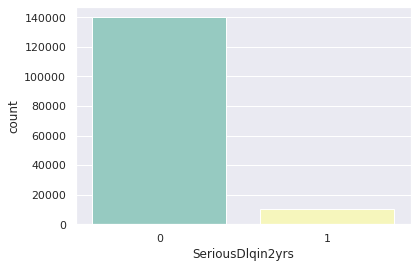

In [5]:
sns.set(style="darkgrid")
sns.countplot(x="SeriousDlqin2yrs", data = credit_card_dataframe, palette="Set3")
print("Total proportion of people defaulted in dataset: {}".format(credit_card_dataframe["SeriousDlqin2yrs"].sum() / len(credit_card_dataframe)))

### Analyzing the age feature

In [6]:
credit_card_dataframe["age"].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Age of Non-Defaulters')

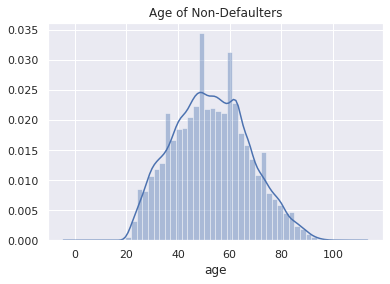

In [7]:
sns.distplot(credit_card_dataframe.loc[credit_card_dataframe["SeriousDlqin2yrs"] == 0]["age"]).set_title("Age of Non-Defaulters")

Text(0.5, 1.0, 'Age of Defaulters')

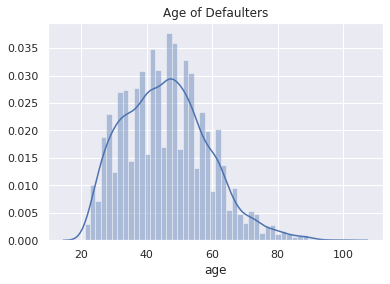

In [8]:
sns.distplot(credit_card_dataframe.loc[credit_card_dataframe["SeriousDlqin2yrs"] == 1]["age"]).set_title("Age of Defaulters")

### Number of times all columns

In [0]:
Num_of_times_all = ["NumberOfTimes90DaysLate", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfTime30-59DaysPastDueNotWorse"]

### Number of times 90 Days late

In [10]:
credit_card_dataframe["NumberOfTimes90DaysLate"].value_counts()

0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

### Number of times 60-89 Days late

In [11]:
credit_card_dataframe["NumberOfTime60-89DaysPastDueNotWorse"].value_counts()

0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

### Number of times 30-59 Days late

In [12]:
credit_card_dataframe["NumberOfTime30-59DaysPastDueNotWorse"].value_counts()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

### Here we can observe that for values above 17 all the three columns share the same value. Since sharing the same values is not possible because 30 days past due 96 times for a single person in a timespan of 2 years is not possible so we removed values above 17 in the NumberOfTimes90DaysLate column.

In [13]:
credit_card_dataframe.loc[credit_card_dataframe["NumberOfTimes90DaysLate"] > 17][Num_of_times_all].describe()

,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTime30-59DaysPastDueNotWorse
count,269.000000,269.000000,269.000000
mean,97.962825,97.962825,97.962825
std,0.270628,0.270628,0.270628
min,96.000000,96.000000,96.000000
25%,98.000000,98.000000,98.000000
50%,98.000000,98.000000,98.000000
75%,98.000000,98.000000,98.000000
max,98.000000,98.000000,98.000000


### Analyzing the DeptRatio feature

In [14]:
credit_card_dataframe["DebtRatio"].describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

In [15]:
credit_card_dataframe["DebtRatio"].quantile(0.90)

1267.0

In [16]:
credit_card_dataframe.loc[credit_card_dataframe["DebtRatio"] > credit_card_dataframe["DebtRatio"].quantile(0.90)][["DebtRatio", "MonthlyIncome", "SeriousDlqin2yrs"]].describe()

,DebtRatio,MonthlyIncome,SeriousDlqin2yrs
count,14995.000000,849.000000,14995.000000
mean,3117.423008,0.195524,0.049817
std,5722.028320,0.396837,0.217573
min,1268.000000,0.000000,0.000000
25%,1804.000000,0.000000,0.000000
50%,2449.000000,0.000000,0.000000
75%,3490.000000,0.000000,0.000000
max,329664.000000,1.000000,1.000000


In [17]:
len(credit_card_dataframe[(credit_card_dataframe["DebtRatio"] > credit_card_dataframe["DebtRatio"].quantile(0.90)) & (credit_card_dataframe['SeriousDlqin2yrs'] == credit_card_dataframe['MonthlyIncome'])])

657

In [18]:
credit_card_dataframe.loc[credit_card_dataframe["DebtRatio"] > credit_card_dataframe["DebtRatio"].quantile(0.90)]["MonthlyIncome"].value_counts()

0.0    683
1.0    166
Name: MonthlyIncome, dtype: int64

In [29]:
credit_card_dataframe["DebtRatio"].quantile(0.975)

3489.024999999994

In [30]:
credit_card_dataframe.loc[credit_card_dataframe["DebtRatio"] > credit_card_dataframe["DebtRatio"].quantile(0.975)][["DebtRatio", "MonthlyIncome", "SeriousDlqin2yrs"]].describe()

,DebtRatio,MonthlyIncome,SeriousDlqin2yrs
count,3750.000000,3750.00000,3750.000000
mean,5917.488000,5133.60320,0.064267
std,10925.524011,1169.58239,0.245260
min,3490.000000,0.00000,0.000000
25%,3957.250000,5400.00000,0.000000
50%,4619.000000,5400.00000,0.000000
75%,5789.500000,5400.00000,0.000000
max,329664.000000,5400.00000,1.000000


In [31]:
len(credit_card_dataframe[(credit_card_dataframe["DebtRatio"] > credit_card_dataframe["DebtRatio"].quantile(0.975)) & (credit_card_dataframe['SeriousDlqin2yrs'] == credit_card_dataframe['MonthlyIncome'])])

164

In [32]:
credit_card_dataframe.loc[credit_card_dataframe["DebtRatio"] > credit_card_dataframe["DebtRatio"].quantile(0.975)]["MonthlyIncome"].value_counts()

5400.0    3565
0.0        173
1.0         12
Name: MonthlyIncome, dtype: int64

### There are almost 164 records which has same values for SeriousDlqin2yrs and MonthlyIncome which needs to be removed from the sample dataset for better results.

### Analyzing the MonthlyIncome feature

In [33]:
credit_card_dataframe["MonthlyIncome"].median()

5400.0

In [0]:
credit_card_dataframe["MonthlyIncome"] = credit_card_dataframe["MonthlyIncome"].fillna(5400)

In [35]:
credit_card_dataframe["MonthlyIncome"].describe()

count    1.500000e+05
mean     6.418455e+03
std      1.289040e+04
min      0.000000e+00
25%      3.903000e+03
50%      5.400000e+03
75%      7.400000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

### Analyzing the NumberOfOpenCreditLinesAndLoans feature

In [36]:
credit_card_dataframe["NumberOfOpenCreditLinesAndLoans"].describe()

count    150000.000000
mean          8.452760
std           5.145951
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


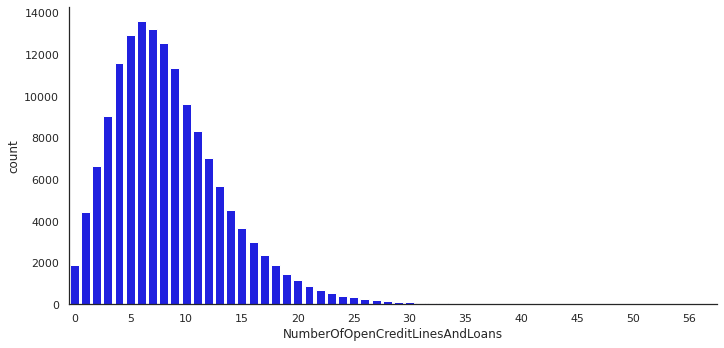

In [37]:
with sns.axes_style('white'):
    g = sns.factorplot("NumberOfOpenCreditLinesAndLoans", data=credit_card_dataframe, aspect=2,
                       kind="count", color='blue')
    g.set_xticklabels(step=5)

### Analyzing the NumberRealEstateLoansOrLines feature

In [38]:
credit_card_dataframe["NumberRealEstateLoansOrLines"].describe()

count    150000.000000
mean          1.018240
std           1.129771
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


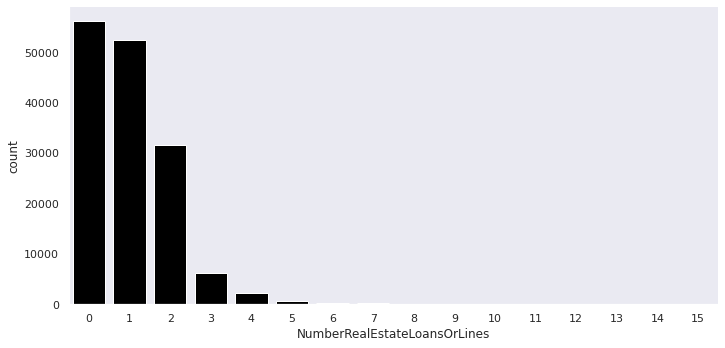

In [39]:
with sns.axes_style('dark'):
    g = sns.factorplot("NumberRealEstateLoansOrLines", data=credit_card_dataframe.loc[credit_card_dataframe["NumberRealEstateLoansOrLines"] <= 15], aspect=2,
                       kind="count", color='black')
    g.set_xticklabels(step=1)

### Analyzing the NumberOfDependents feature

In [40]:
credit_card_dataframe["NumberOfDependents"].describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [41]:
credit_card_dataframe.loc[credit_card_dataframe["NumberOfDependents"] <= 15]["SeriousDlqin2yrs"].describe()

count    146075.000000
mean          0.067411
std           0.250733
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SeriousDlqin2yrs, dtype: float64

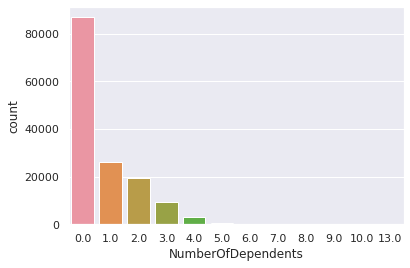

In [42]:
sns.countplot(x="NumberOfDependents", data=credit_card_dataframe.loc[credit_card_dataframe["NumberOfDependents"] <= 15])

### Preprocessing the dataset based on our analysis

In [0]:
credit_card_dataframe = credit_card_dataframe.loc[credit_card_dataframe["DebtRatio"] <= credit_card_dataframe["DebtRatio"].quantile(0.975)]
credit_card_dataframe = credit_card_dataframe.loc[(credit_card_dataframe["RevolvingUtilizationOfUnsecuredLines"] >= 0) & (credit_card_dataframe["RevolvingUtilizationOfUnsecuredLines"] < 13)]
credit_card_dataframe = credit_card_dataframe.loc[credit_card_dataframe["NumberOfTimes90DaysLate"] <= 17]

In [0]:
dependents_mode = credit_card_dataframe["NumberOfDependents"].mode()[0] # impute with mode
credit_card_dataframe["NumberOfDependents"] = credit_card_dataframe["NumberOfDependents"].fillna(dependents_mode)

In [0]:
income_median = credit_card_dataframe["MonthlyIncome"].median()
credit_card_dataframe["MonthlyIncome"] = credit_card_dataframe["MonthlyIncome"].fillna(income_median)

In [46]:
credit_card_dataframe.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,145755.000000,145755.000000,145755.000000,145755.000000,145755.000000,1.457550e+05,145755.000000,145755.000000,145755.000000,145755.000000,145755.000000
mean,0.066035,0.321235,52.290261,0.244540,210.578000,6.454218e+03,8.393551,0.091427,0.986724,0.065082,0.743638
std,0.248345,0.370229,14.845335,0.695168,620.822863,1.307069e+04,5.108814,0.487404,1.099485,0.330395,1.108977
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029352,41.000000,0.000000,0.170697,3.841000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.150747,52.000000,0.000000,0.356520,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.551640,63.000000,0.000000,0.758490,7.500000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,12.462747,109.000000,13.000000,3489.000000,3.008750e+06,58.000000,17.000000,54.000000,11.000000,20.000000


### Training the model

In [0]:
import pandas as pd
import numpy as np
import joblib
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from xgboost import XGBClassifier

In [0]:
X = credit_card_dataframe.drop("SeriousDlqin2yrs", axis=1)
Y = credit_card_dataframe["SeriousDlqin2yrs"]

In [0]:
model_params = {
    "model_params": {
        'min_child_weight': list(range(1,10,2)),
        'gamma':[i/10.0 for i in range(0,5)],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree':[i/10.0 for i in range(6,10)],
        'max_depth':range(3,10,2),
        'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2],
        'reg_lambda': [0, 0.001, 0.005, 0.01, 0.05, 0.2, 0.4, 0.6, 0.8, 1],
        'learning_rate': [0.001, 0.002, 0.005, 0.006, 0.01, 0.02, 0.05, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.2],
        'n_estimators': [50, 100, 150, 200, 250, 300,350,400,450,500, 550, 600, 650, 700, 750],
        "booster": ["gbtree", "gblinear", "dart"]
        }
}

In [50]:
model = XGBClassifier()
model.fit(X, Y, eval_metric="auc")
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


### Predicting the SeriousDlqin2yrs feature based on our trained model.

In [51]:
ccs_test = pd.read_csv("/content/drive/My Drive/Datasets/cs-test.csv", index_col=0)
ccs_test

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [0]:
dependents_mode_test = ccs_test["NumberOfDependents"].mode()[0] # impute with mode
ccs_test["NumberOfDependents"] = ccs_test["NumberOfDependents"].fillna(dependents_mode_test)

In [0]:
income_median_test = ccs_test["MonthlyIncome"].median()
ccs_test["MonthlyIncome"] = ccs_test["MonthlyIncome"].fillna(income_median_test)

In [0]:
ccs_test.insert(0, 'Index', ccs_test.index)

In [0]:
#ccs_test = ccs_test.drop(["id"],axis=1)

In [0]:
test_X = ccs_test.drop(["Index", "SeriousDlqin2yrs"],axis=1)
predict_prob = model.predict_proba(test_X)[:, -1]

In [57]:
result = pd.DataFrame({"Id": ccs_test["Index"], "Probability": predict_prob})
result["Id"] = result["Id"].astype(int)
result["Probability"] = result["Probability"].astype(float)
print(result)

            Id  Probability
1            1     0.082890
2            2     0.043629
3            3     0.013492
4            4     0.074971
5            5     0.101335
...        ...          ...
101499  101499     0.029998
101500  101500     0.317088
101501  101501     0.006960
101502  101502     0.062274
101503  101503     0.047394

[101503 rows x 2 columns]


In [0]:
result.to_csv('final_result.csv')

### Creating Dataframe for visualization

In [62]:
df_visualization = result.join(ccs_test.set_index('Index'), on='Id')

,Id,Probability,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.082890,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,2,0.043629,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,3,0.013492,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,4,0.074971,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,5,0.101335,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101499,101499,0.029998,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101500,101500,0.317088,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101501,101501,0.006960,NaN,0.081596,70,0,836.000000,5400.0,3,0,0,0,0.0
101502,101502,0.062274,NaN,0.335457,56,0,3568.000000,5400.0,8,0,2,1,3.0


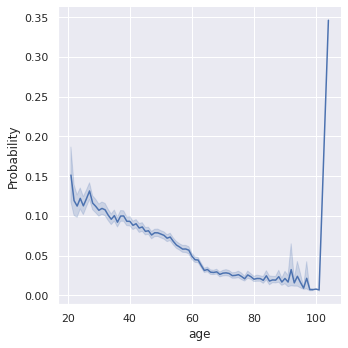

In [67]:
sns.relplot(kind="line", x="age", y="Probability", data=df_visualization)

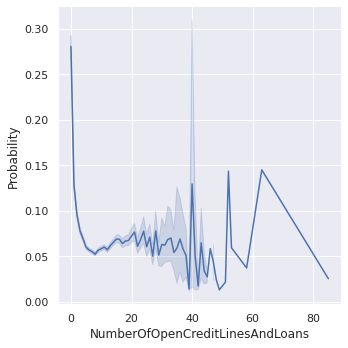

In [68]:
sns.relplot(kind="line", x="NumberOfOpenCreditLinesAndLoans", y="Probability", data=df_visualization)

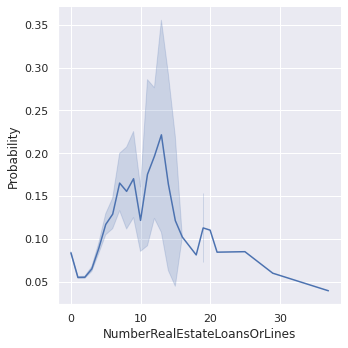

In [69]:
sns.relplot(kind="line", x="NumberRealEstateLoansOrLines", y="Probability", data=df_visualization)

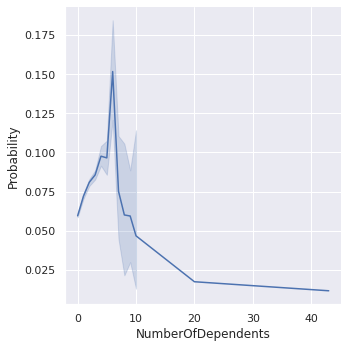

In [70]:
sns.relplot(kind="line", x="NumberOfDependents", y="Probability", data=df_visualization)